In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR



In [7]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                              test_size=0.25,
                                              random_state=42)

In [15]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [8]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


# KNN
# Model & Tahmin

In [9]:
knn_model=KNeighborsRegressor().fit(X_train, y_train)

In [10]:
knn_model

KNeighborsRegressor()

In [11]:
?knn_model

Type:        KNeighborsRegressor
String form: KNeighborsRegressor()
File:        c:\users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\neighbors\_regression.py
Docstring:  
Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets
associated of the nearest neighbors in the training set.

Read more in the :ref:`User Guide <regression>`.

.. versionadded:: 0.9

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined fun

In [13]:
knn_model.n_neighbors

5

In [14]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [16]:
y_pred=knn_model.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

# Model Tuning

In [18]:
#el yordamı ile k ya farklı degerler atayıp tahmin yapacagız

In [22]:
RMSE=[]
for k in range(10):
    k=k+1
    knn_model=KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred=knn_model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=", k, "için RMSE degeri:", rmse)

k= 1 için RMSE degeri: 455.03925390751965
k= 2 için RMSE degeri: 415.99629571490965
k= 3 için RMSE degeri: 420.6765370082348
k= 4 için RMSE degeri: 428.8564674588792
k= 5 için RMSE degeri: 426.6570764525201
k= 6 için RMSE degeri: 423.5071669008732
k= 7 için RMSE degeri: 414.9361222421057
k= 8 için RMSE degeri: 413.7094731463598
k= 9 için RMSE degeri: 417.84419990871265
k= 10 için RMSE degeri: 421.6252180741266


In [23]:
#GridSearchCV   #otomotik bir şekilde k ya 1 den 30 a kadar degerler atayıp en iyi k degerini bulduk

In [24]:
knn_params={"n_neighbors":np.arange(1,30,1)}

In [25]:
knn=KNeighborsRegressor()

In [26]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=10).fit(X_train, y_train)

In [28]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [29]:
# final model

In [30]:
knn_tuned=KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [31]:
y_pred=knn_tuned.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

# DESTEK VEKTÖR REGRESYONU
# Model & Tahmin

In [33]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                              test_size=0.25,
                                              random_state=42)

In [58]:
svr_model=SVR("linear").fit(X_train,y_train)

C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [60]:
y_pred=svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.04084185624924

In [42]:
""""svr_model=SVR("rbf").fit(X_train,y_train)   (linear olmayan kernel ile) (dogrusal omayan)
y_pred=svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))"""

'"svr_model=SVR("rbf").fit(X_train,y_train)\ny_pred=svr_model.predict(X_test)\nnp.sqrt(mean_squared_error(y_test,y_pred))'

# Model Tuning

In [61]:
svr_params={"C":[0.1,0.5,1,3]}

In [65]:
svr_cv_model=GridSearchCV(svr_model,svr_params,verbose=2,n_jobs=-1,cv=5).fit(X_train, y_train) #n_jobs işlemcinin max 
                                                                                             #performansda olmasını sağlar

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [66]:
svr_cv_model.best_params_

{'C': 0.5}

In [67]:
# final model

In [68]:
svr_tuned=SVR("linear",C=0.5).fit(X_train,y_train)

C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [69]:
y_pred=svr_tuned.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test,y_pred))

367.9874739022889

# YAPAY SİNİR AĞLARI

# Model & Tahmin

In [109]:
scaler=StandardScaler()

In [110]:
scaler.fit(X_train)

StandardScaler()

In [111]:
X_train_scaled=scaler.transform(X_train) # standartlastırma işlemi yaptık

In [112]:
scaler.fit(X_test)

StandardScaler()

In [113]:
X_test_scaled=scaler.transform(X_test)   # standartlastırma işlemi yaptık

In [114]:
mlp_model=MLPRegressor().fit(X_train_scaled,y_train) # modelimizi kurduk

C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [115]:
mlp_model.predict(X_test_scaled)[0:5]

array([23.10731437, 38.08531863, 71.7238989 , 16.53523176, 22.68813029])

In [116]:
y_pred=mlp_model.predict(X_test_scaled)

In [117]:
np.sqrt(mean_squared_error(y_test,y_pred))

658.776317608025

# Model Tuning

In [118]:
mlp_model

MLPRegressor()

In [119]:
mlp_params={"alpha":[0.1,0.01,0.02,0.001,0.0001],
           "hidden_layer_sizes":[(10,20),(5,5),(100,100)]}

In [127]:
mlp_cv_model=GridSearchCV(mlp_model,mlp_params,cv=10,verbose=2,n_jobs=-1).fit(X_train_scaled,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [129]:
mlp_cv_model.best_params_

{'alpha': 0.02, 'hidden_layer_sizes': (100, 100)}

In [130]:
# final model

In [131]:
mlp_tuned=MLPRegressor(alpha=0.02,hidden_layer_sizes=(100,100)).fit(X_train_scaled,y_train)

C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [132]:
y_pred=mlp_tuned.predict(X_test_scaled)

In [133]:
np.sqrt(mean_squared_error(y_test,y_pred))

364.78379272203426

# CART

# Model & Tahmin

In [3]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                              test_size=0.25,
                                              random_state=42)

In [4]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

In [5]:
cart_model=DecisionTreeRegressor()

In [6]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [7]:
# Tek Degiskenli Tahmin

In [8]:
y_pred=cart_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

In [10]:
# Tum Degiskenler ile Tahmin

In [11]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                              test_size=0.25,
                                              random_state=42)

In [12]:
cart_model=DecisionTreeRegressor().fit(X_train,y_train)

In [13]:
y_pred=cart_model.predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test,y_pred))

452.0482368864371

In [153]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=4, min_samples_split=50)
File:        c:\users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae", "poisson"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    "mae" for the mean absolute error, which minimizes the L1 loss using
    the median of each terminal node, and "poisson" which uses reduction in
    Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

    

# Model Tuning

In [15]:
cart_params={"max_depth":[2,3,4,5,10,20],
            "min_samples_split":[2,10,5,30,50,10]}

In [16]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [17]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [18]:
# final model

In [20]:
cart_tuned=DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(X_train,y_train)

In [21]:
y_pred=cart_tuned.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434

# RANDOM FORESTS

# Model & Tahmin

In [23]:
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [25]:
dir(rf_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_

In [26]:
y_pred=rf_model.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

345.00286717448006

# Model Tuning

In [31]:
rf_params={"max_depth":[5,8,10],# max agac deriniligi
          "max_features":[2,5,10],# max degisken sayısı
          "n_estimators":[200,500,1000,2000],# kullanılack agac sayısı
          "min_samples_split":[2,10,80] # bölünme için gerekli olan minimum örnek sayısı
          }

In [32]:
rf_cv_model=GridSearchCV(rf_model,rf_params,n_jobs=-1,cv=10).fit(X_train,y_train)

In [33]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [35]:
rf_tuned=RandomForestRegressor(random_state=42,max_depth=8,max_features=2,n_estimators=200,min_samples_split=2).fit(X_train,y_train)

In [36]:
y_pred=rf_tuned.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))

348.6776176416439

# Degisken Önem Düzeyi

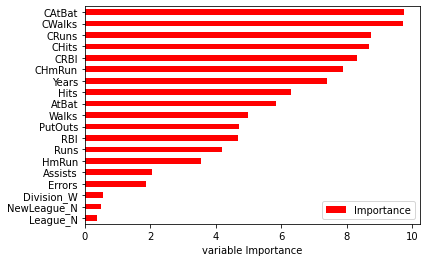

In [40]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r",)
plt.xlabel("variable Importance")
plt.gca().legend=None

# GRADİENT BOOSTİNG MACHİNES

# Model & Tahmin

In [44]:
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)

In [45]:
y_pred=gbm_model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

350.46089602770655

In [47]:
?gbm_model

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        c:\users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'
    Loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combination of the two. 'quantile'
    allows quantile regression (use `alpha` to specify the quantile).

learning_rate : float, default=0.1
    Learning rate shrinks the

# Model Tuning

In [49]:
gbm_params={"learning_rate":[0.1,0.001],
           "loss":["lad","ls"],
           "max_depth":[3,5],
           "n_estimators":[200,500],
           "subsample":[1,0.5]}

In [50]:
gbm_cv_model=GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


In [51]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 1}

In [53]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.1,loss="lad",max_depth=3,n_estimators=500,subsample=1).fit(X_train,y_train)

In [54]:
y_pred=gbm_tuned.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test,y_pred))

321.3084439958772

In [57]:
# Degisken önem düzeyi

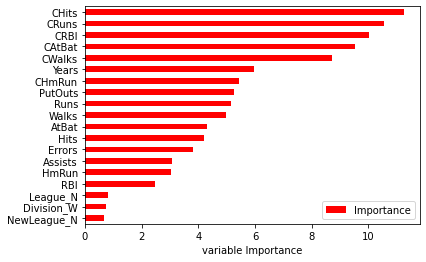

In [58]:
Importance=pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r",)
plt.xlabel("variable Importance")
plt.gca().legend=None

# XGBOOST 

In [59]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                              test_size=0.25,
                                              random_state=42)

# Model & Tahmin

In [61]:
import xgboost

In [62]:
from xgboost import XGBRegressor

In [63]:
xgb=XGBRegressor().fit(X_train,y_train)

In [64]:
y_pred=xgb.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test,y_pred))

355.46515176059927

# Model Tuning

In [70]:
xgb_params={"learning_rate":[0.5,0.1],
           "colsample_bytree":[0.7,0,4],
           "max_depth":[2,4],
            "n_estimators":[100,200]}

In [71]:
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\aslisesli\anaconda3\envs\python\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.52146139 0.52190344 0.49529516 0.495298   0.5784494  0.58622123
 0.49921855 0.50174141 0.39566682 0.37306205 0.21847249 0.21795474
 0.55023658 0.54598233 0.51329184 0.49417546        nan        nan
        nan        nan        nan        nan        nan        nan]
  category=UserWarning


In [72]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 200}

In [76]:
xgb_tuned=XGBRegressor(learning_rate=0.1,colsample_bytree=0.7,max_depth=2,n_estimators=200).fit(X_train,y_train)

In [77]:
y_pred=xgb_tuned.predict(X_test)

In [78]:
np.sqrt(mean_squared_error(y_test,y_pred))

346.49123590215214

In [81]:
# Degisken önem düzeyi

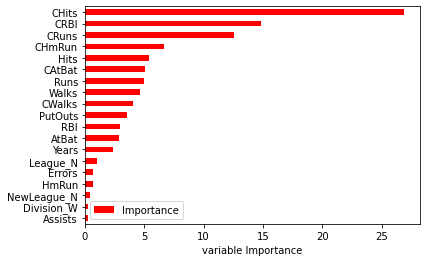

In [79]:
Importance=pd.DataFrame({"Importance":xgb_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r",)
plt.xlabel("variable Importance")
plt.gca().legend=None

# LİGHT GBM

# Model & Tahmin

In [83]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                              test_size=0.25,
                                              random_state=42)

In [84]:
from lightgbm import LGBMRegressor

In [86]:
lgb_model=LGBMRegressor().fit(X_train,y_train)

In [87]:
y_pred=lgb_model.predict(X_test)

In [88]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

# Model Tuning

In [90]:
lgm_params={"learning_rate":[0.1,0.001,0.5],
            "n_estimators":[20,50,100],
           "max_depth":[6,7,8]}

In [91]:
lgm_cv_model=GridSearchCV(lgb_model,lgm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [92]:
lgm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [93]:
lgb_tuned=LGBMRegressor(learning_rate=0.1,n_estimators=20,max_depth=6).fit(X_train,y_train)

In [94]:
y_pred=lgb_tuned.predict(X_test)

In [95]:
np.sqrt(mean_squared_error(y_test,y_pred))

371.5044868943621

# CATBOOST

# Model & Tahmin

In [102]:
from catboost import CatBoostRegressor

In [103]:
catb_model=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 72.9ms	remaining: 1m 12s
1:	learn: 432.4168868	total: 75.4ms	remaining: 37.6s
2:	learn: 426.3836690	total: 81.1ms	remaining: 27s
3:	learn: 420.2261014	total: 83.9ms	remaining: 20.9s
4:	learn: 414.9976675	total: 86.8ms	remaining: 17.3s
5:	learn: 409.6125323	total: 89.1ms	remaining: 14.8s
6:	learn: 403.9277911	total: 91.4ms	remaining: 13s
7:	learn: 398.4395285	total: 96.6ms	remaining: 12s
8:	learn: 392.4517081	total: 99ms	remaining: 10.9s
9:	learn: 387.4871123	total: 102ms	remaining: 10.1s
10:	learn: 382.6230510	total: 105ms	remaining: 9.44s
11:	learn: 378.1012454	total: 110ms	remaining: 9.06s
12:	learn: 372.6002306	total: 113ms	remaining: 8.57s
13:	learn: 368.4682192	total: 116ms	remaining: 8.14s
14:	learn: 364.0565766	total: 118ms	remaining: 7.77s
15:	learn: 359.5683249	total: 121ms	remaining: 7.45s
16:	learn: 355.1782794	total: 125ms	remaining: 7.25s
17:	learn: 350.4689946	total: 128ms	remaining: 7s
18:	learn: 346.2553348	tota

In [104]:
y_pred=catb_model.predict(X_test)

In [106]:
np.sqrt(mean_squared_error(y_test,y_pred))

350.2683163098795

# Model Tuning

In [109]:
catb_params={"iterations":[200,500],
            "learning_rate":[0.01,0.1],
            "depth":[3,6]}

In [110]:
catb_model=CatBoostRegressor()

In [111]:
catb_cv_model=GridSearchCV(catb_model,catb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0:	learn: 425.7900818	total: 968us	remaining: 193ms
1:	learn: 404.8723520	total: 2.01ms	remaining: 199ms
2:	learn: 387.4057666	total: 2.9ms	remaining: 191ms
3:	learn: 372.2801584	total: 3.85ms	remaining: 189ms
4:	learn: 358.9204229	total: 4.87ms	remaining: 190ms
5:	learn: 347.0083933	total: 5.98ms	remaining: 193ms
6:	learn: 336.0130818	total: 6.92ms	remaining: 191ms
7:	learn: 324.3923300	total: 7.7ms	remaining: 185ms
8:	learn: 314.8690957	total: 8.45ms	remaining: 179ms
9:	learn: 308.5075563	total: 9.18ms	remaining: 174ms
10:	learn: 298.8587285	total: 9.92ms	remaining: 170ms
11:	learn: 294.7655438	total: 10.6ms	remaining: 167ms
12:	learn: 288.0697862	total: 11.4ms	remaining: 163ms
13:	learn: 282.6697154	total: 12.1ms	remaining: 160ms
14:	learn: 277.6121667	total: 12.8ms	remaining: 158ms
15:	learn: 273.4383979	total: 13.6ms	remaining: 157ms
16:	learn: 269.1556201	total: 14.5ms	remaining: 156ms
17:	learn: 264.8098704	total: 15.2m

In [112]:
catb_cv_model.best_params_ 

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [114]:
catb_tuned=CatBoostRegressor(depth=3,iterations=200,learning_rate=0.1).fit(X_train,y_train)

0:	learn: 425.7900818	total: 1.3ms	remaining: 259ms
1:	learn: 404.8723520	total: 3.02ms	remaining: 300ms
2:	learn: 387.4057666	total: 6.59ms	remaining: 433ms
3:	learn: 372.2801584	total: 9.74ms	remaining: 477ms
4:	learn: 358.9204229	total: 15.4ms	remaining: 599ms
5:	learn: 347.0083933	total: 16.9ms	remaining: 548ms
6:	learn: 336.0130818	total: 19.1ms	remaining: 527ms
7:	learn: 324.3923300	total: 20.2ms	remaining: 484ms
8:	learn: 314.8690957	total: 21.2ms	remaining: 450ms
9:	learn: 308.5075563	total: 22.1ms	remaining: 420ms
10:	learn: 298.8587285	total: 22.9ms	remaining: 394ms
11:	learn: 294.7655438	total: 23.7ms	remaining: 372ms
12:	learn: 288.0697862	total: 24.6ms	remaining: 353ms
13:	learn: 282.6697154	total: 25.7ms	remaining: 341ms
14:	learn: 277.6121667	total: 28.6ms	remaining: 353ms
15:	learn: 273.4383979	total: 29.6ms	remaining: 340ms
16:	learn: 269.1556201	total: 30.5ms	remaining: 328ms
17:	learn: 264.8098704	total: 31.3ms	remaining: 317ms
18:	learn: 261.6700768	total: 32.2ms	re

In [115]:
y_pred=catb_tuned.predict(X_test)

In [116]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.3125832615482

# MAKİNE ÖĞRENMESİ GÖREVLERİNİN OTOMOTİKLEŞTİRİLMESİ

In [117]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])

In [138]:
def compML(df,y,alg):        # fonksiyona verisetini, bagımlı degiskeni ve kullanacaıgımız algoritmayı veriyoruz
    #train-test ayrimi
    y=df[y]
    X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
    X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
    X_train,X_test,y_train,y_test=train_test_split(X, y,                                           
                                              test_size=0.25,
                                              random_state=42)
    # modelleme
    model=alg().fit(X_train,y_train)
    y_pred=model.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi=alg.__name__
    print(model_ismi,"Modeli Test Hatası:",RMSE)
     
    
    

In [139]:
compML(df,"Salary",LGBMRegressor) #fonksiyonu cagırıyoruz

LGBMRegressor Modeli Test Hatası: 363.8712087611089


In [136]:
compML(df,"Salary",SVR)

SVR : 460.0032657244849


In [140]:
models=[
        LGBMRegressor,
        SVR,
        XGBRegressor,
        GradientBoostingRegressor,
        RandomForestRegressor,
        KNeighborsRegressor,
        MLPRegressor]

In [147]:
a=[]

In [152]:
for i in models:
    compML(df,"Salary",i)
    print(" ")

LGBMRegressor Modeli Test Hatası: 363.8712087611089
 
SVR Modeli Test Hatası: 460.0032657244849
 
XGBRegressor Modeli Test Hatası: 355.46515176059927
 
GradientBoostingRegressor Modeli Test Hatası: 356.1741089520326
 
RandomForestRegressor Modeli Test Hatası: 330.6475978565971
 
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
 
MLPRegressor Modeli Test Hatası: 439.13668142086175
 
